# Árbol de decisión para especies de flores

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
mainpath = "https://raw.githubusercontent.com/joanby/python-ml-course/master/datasets"
filepath = "iris/iris.csv"
data = pd.read_csv(os.path.join(mainpath,filepath))
data.sample(5)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
20,5.4,3.4,1.7,0.2,setosa
139,6.9,3.1,5.4,2.1,virginica
38,4.4,3.0,1.3,0.2,setosa
112,6.8,3.0,5.5,2.1,virginica
56,6.3,3.3,4.7,1.6,versicolor


In [3]:
data.shape

(150, 5)

(array([50.,  0.,  0.,  0.,  0., 50.,  0.,  0.,  0., 50.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

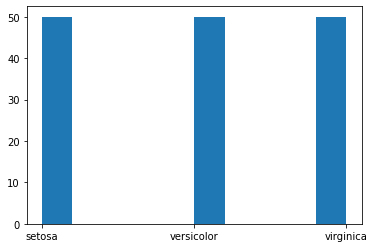

In [4]:
plt.hist(data.Species)

In [5]:
data.Species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [6]:
colnames = data.columns.values.tolist()
predictors = colnames[:4] # X
target = colnames[4] # Y

In [7]:
X = data[predictors]
Y = data[target]

In [8]:
import numpy as np
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25, random_state = 0)

In [10]:
train = pd.concat([X_train,Y_train], axis = 1)
test = pd.concat([X_test,Y_test], axis = 1)

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
tree = DecisionTreeClassifier(criterion="entropy", min_samples_split=20, random_state=99) # Se usa el algoritmo ID3
tree.fit(train[predictors], train[target])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=99, splitter='best')

In [13]:
preds = tree.predict(X_test)

In [14]:
pd.crosstab(Y_test, preds, rownames=["Actual"], colnames=["Predictions"])

Predictions,setosa,versicolor,virginica
Actual,,,
setosa,13,0,0
versicolor,0,15,1
virginica,0,0,9


In [15]:
tree.score(X_test,Y_test)

0.9736842105263158

## Visualización del árbol de decisión

In [16]:
from sklearn.tree import export_graphviz

In [17]:
with open("resources/iris_dtree.dot", "w") as dotfile:
    export_graphviz(tree, out_file=dotfile, feature_names=predictors)
    dotfile.close()

In [18]:
import os
from graphviz import Source

In [19]:
file = open("resources/iris_dtree.dot", "r")
text = file.read()
text

'digraph Tree {\nnode [shape=box] ;\n0 [label="Petal.Length <= 2.35\\nentropy = 1.581\\nsamples = 112\\nvalue = [37, 34, 41]"] ;\n1 [label="entropy = 0.0\\nsamples = 37\\nvalue = [37, 0, 0]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="Petal.Length <= 4.95\\nentropy = 0.994\\nsamples = 75\\nvalue = [0, 34, 41]"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="Petal.Width <= 1.65\\nentropy = 0.414\\nsamples = 36\\nvalue = [0, 33, 3]"] ;\n2 -> 3 ;\n4 [label="entropy = 0.0\\nsamples = 32\\nvalue = [0, 32, 0]"] ;\n3 -> 4 ;\n5 [label="entropy = 0.811\\nsamples = 4\\nvalue = [0, 1, 3]"] ;\n3 -> 5 ;\n6 [label="Petal.Width <= 1.75\\nentropy = 0.172\\nsamples = 39\\nvalue = [0, 1, 38]"] ;\n2 -> 6 ;\n7 [label="entropy = 0.811\\nsamples = 4\\nvalue = [0, 1, 3]"] ;\n6 -> 7 ;\n8 [label="entropy = 0.0\\nsamples = 35\\nvalue = [0, 0, 35]"] ;\n6 -> 8 ;\n}'

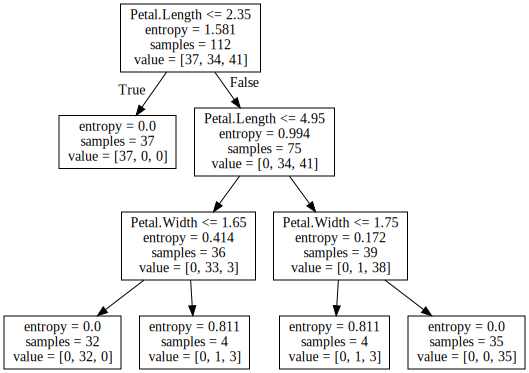

In [20]:
Source(text)

## Cross Validation para la poda

In [21]:
tree = DecisionTreeClassifier(criterion="entropy", max_depth=5, min_samples_split=20, random_state=99)
tree.fit(X,Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=99, splitter='best')

In [22]:
from sklearn.model_selection import KFold

In [23]:
#cv = KFold(n = X.shape[0], n_folds=10, shuffle=True, random_state=1)
cv = KFold(n_splits=10, shuffle=True, random_state=1)

In [24]:
from sklearn.model_selection import cross_val_score

In [25]:
scores = cross_val_score(tree, X, Y, scoring="accuracy", cv = cv, n_jobs=1)
scores

array([1.        , 0.93333333, 0.93333333, 0.93333333, 1.        ,
       0.93333333, 1.        , 0.86666667, 0.93333333, 0.8       ])

In [26]:
score = np.mean(scores)
score

0.9333333333333333

In [27]:
for i in range(1,11):
  tree = DecisionTreeClassifier(criterion="entropy", max_depth=i, min_samples_split=20, random_state=99)
  tree.fit(X,Y)
  cv = KFold(n_splits=10, shuffle=True, random_state=1)
  scores = cross_val_score(tree, X, Y, scoring="accuracy", cv = cv, n_jobs=1)
  score = np.mean(scores)
  print("Score para i = ",i," es de ", score)
  #print("   ",tree.feature_importances_)

Score para i =  1  es de  0.5666666666666667
Score para i =  2  es de  0.9200000000000002
Score para i =  3  es de  0.9400000000000001
Score para i =  4  es de  0.9333333333333333
Score para i =  5  es de  0.9333333333333333
Score para i =  6  es de  0.9333333333333333
Score para i =  7  es de  0.9333333333333333
Score para i =  8  es de  0.9333333333333333
Score para i =  9  es de  0.9333333333333333
Score para i =  10  es de  0.9333333333333333


In [28]:
predictors

['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']

## Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
forest = RandomForestClassifier(n_jobs=2, oob_score=True, n_estimators=100)
forest.fit(X,Y)

In [ ]:
forest.oob_decision_function_

In [ ]:
forest.oob_score_